<a href="https://colab.research.google.com/github/AshikaAnand12/clustering/blob/main/ClusteringTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means 

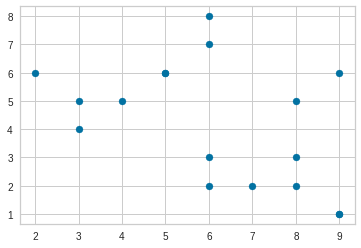

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
#Creating a dataset and plotting
X = np.array([[3,5],[3,4],[5,6],[2,6],[4,5],[6,8],[6,2],[6,3],[5,6],[6,7],[7,2],[8,5],[9,1],[8,2],[9,6],[9,1],[8,3]])

plt.scatter(X[:,0],X[:,1], label='True Position')
plt.show()

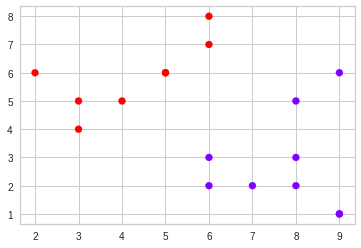

In [27]:
#Clustering dataset into 2 groups (k=2)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.show()

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [30]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [31]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [32]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [33]:
data = data.loc[:, ['ApplicantIncome', 'LoanAmount']]
data.head(2)

,ApplicantIncome,LoanAmount
0,4583,128.0
1,3000,66.0


In [34]:
X = data.values

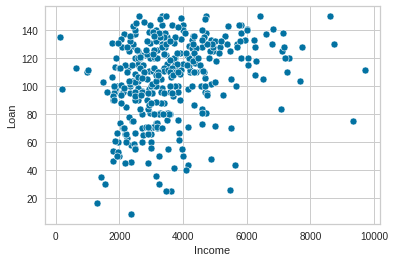

In [35]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

In [36]:
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

In [37]:
import random
def kmeans(X, k):
  
  diff = 1
  cluster = np.zeros(X.shape[0])

  # select k random centroids
  random_indices = np.random.choice(len(X), size=k, replace=False)
  centroids = X[random_indices, :]

  while diff:

    # for each observation
    for i, row in enumerate(X):

      mn_dist = float('inf')
      # dist of the point from all centroids
      for idx, centroid in enumerate(centroids):
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)

        # store closest centroid 
        if mn_dist > d:
          mn_dist = d
          cluster[i] = idx

    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values

    # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
  return centroids, cluster  

In [38]:
cost_list = []
for k in range(1, 10):
  centroids, cluster = kmeans(X, k)
  # WCSS (Within cluster sum of square)
  cost = calculate_cost(X, centroids, cluster)
  cost_list.append(cost)

In [39]:
k = 4
centroids, cluster = kmeans(X, k)

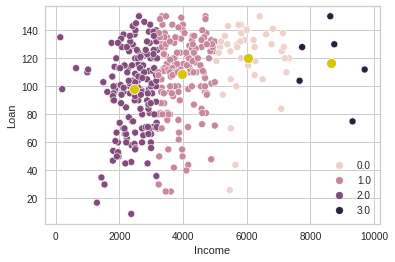

In [40]:
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

# Heirarchial Clustering

In [41]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X)

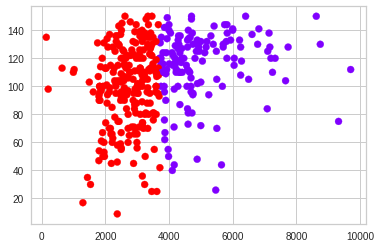

In [42]:
plt.scatter(X[:,0],X[:,1], c=clustering.labels_, cmap='rainbow')
plt.show()

# Gaussian mixture models clustering

In [43]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
labels = gm.predict(X)

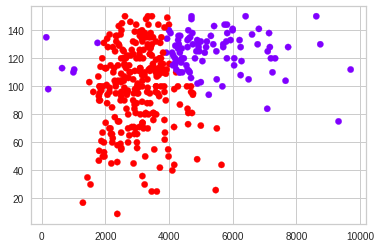

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='rainbow')
plt.show()

# DBSCAN clustering

In [45]:
from sklearn.cluster import DBSCAN
X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80],[5,6],[6,7],[7,2],[8,5],[9,1],[8,2],[9,6],[9,1],[30,60]])
cluster = DBSCAN(eps=3, min_samples=2).fit(X)

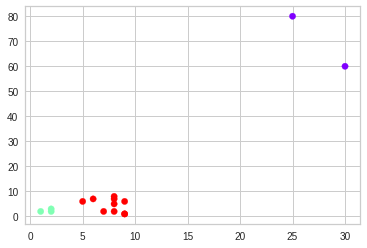

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_, s=40, cmap='rainbow')
plt.show()

# References

1. https://scikit-learn.org/stable/modules/clustering.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
3. https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
4. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN
5. https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
6. https://medium.com/nerd-for-tech/k-means-python-implementation-from-scratch-8400f30b8e5c